<a href="https://colab.research.google.com/github/Adheena-Ajayghosh/Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

Lab 3<br>
Module Coordinator: Amit Pandey amit.pandey@research.iiit.ac.in <br>
<br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing. We will also explore how data augmentation affects accuracy.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
type(dataset), dataset.DESCR

(sklearn.utils._bunch.Bunch,
 '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of 

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel



5,5
6,6
8,9


0,0

(0, 0)

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred =NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


In [ ]:
data_points = np.array([[5, 5], [6, 6], [7, 7], [8, 8], [0, 0], [10, 10], [15, 15]])
labels = np.array(['A', 'B', 'C', 'A | C', 'B | A', 'A', 'C'])

for i, (point, label) in enumerate(zip(data_points, labels)):
    print(f"{point} - {label}")

[5 5] - A
[6 6] - B
[7 7] - C
[8 8] - A | C
[0 0] - B | A
[10 10] - A
[15 15] - C


## Interesting: See how train accuracy of nearest neighbour is 1 i.e. 100%. Ponder and Explain.

For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.33925097276264593


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34701492537313433


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

# **SOLUTIONS**

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

dataset = datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
dataset.target = dataset.target.astype(np.int) # so that we can classify
print(dataset.data.shape)
print(dataset.target.shape)


(20640, 8)
(20640,)


<ipython-input-36-bd3a7322178e>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


In [37]:
type(dataset), dataset.DESCR


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel



In [38]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel) #Length of the groundtruth labels and predicted labels should be the same
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [39]:
def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    split1data = data[split1]  # Corrected usage of boolean mask
    split1label = label[split1]
    split2data = data[split2]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label


In [40]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel) * 100 / len(dataset.target), '%')


Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


In [41]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 85/100)

In [42]:
validation_percentage = len(vallabel) * 100 / (len(vallabel) + len(trainlabel))

print('percent of validation data =', len(vallabel)*100/len(vallabel)+len(trainlabel))
print('Percent of validation data = ', validation_percentage, '%')
trainpred =NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

percent of validation data = 14165.0
Percent of validation data =  14.736905916585838 %
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16530394596516174


In [43]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 65/100)

In [44]:
validation_percentage = len(vallabel) * 100 / (len(vallabel) + len(trainlabel))

print('percent of validation data =', len(vallabel)*100/len(vallabel)+len(trainlabel))
print('Percent of validation data = ', validation_percentage, '%')
trainpred =NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

percent of validation data = 10810.0
Percent of validation data =  35.07516973811833 %
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16171802054154996


In [45]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 80/100)

In [46]:
validation_percentage = len(vallabel) * 100 / (len(vallabel) + len(trainlabel))

print('percent of validation data =', len(vallabel)*100/len(vallabel)+len(trainlabel))
print('Percent of validation data = ', validation_percentage, '%')
trainpred =NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

percent of validation data = 13339.0
Percent of validation data =  19.744180407371484 %
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.1702545509479568


In [47]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 40/100)


In [ ]:
validation_percentage = len(vallabel) * 100 / (len(vallabel) + len(trainlabel))

print('percent of validation data =', len(vallabel)*100/len(vallabel)+len(trainlabel))
print('Percent of validation data = ', validation_percentage, '%')
trainpred =NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

percent of validation data = 6763.0
Percent of validation data =  59.90974729241877 %
Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16058832357796787


In [48]:
validation_percentages = [85,65,80,40]
nn_accuracies = [1, 1, 1, 1]
random_accuracies = [0.16290097629009762,  0.16744957170489086, 0.16177351707609347,  0.16058832357796787]


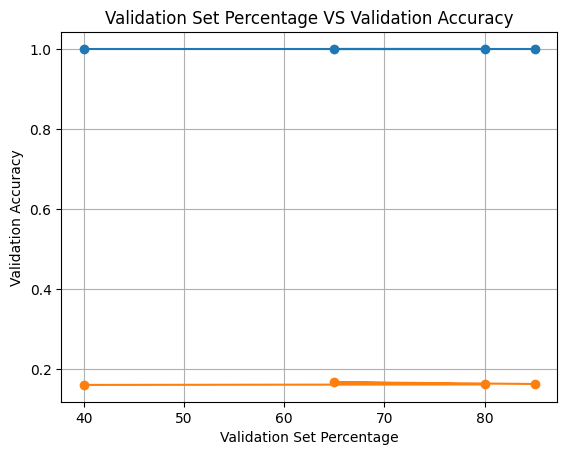

In [49]:
plt.plot(validation_percentages, nn_accuracies, marker='o', label='NN')
plt.plot(validation_percentages, random_accuracies, marker='o', label='Random Classifier')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Validation Accuracy')
plt.title('Validation Set Percentage VS Validation Accuracy')
plt.grid(True)
plt.show()


ANSWERS

1.When you increase or decrease the percentage of the validation set, it can have various effects on the accuracy of the validation set.
Increasing the Percentage of the Validation Set:

Effect on Model Complexity: Increasing the validation set percentage reduces the amount of data available for training. This can result in a less complex model being trained, as it has fewer examples to learn from.

Effect on Overfitting: A larger validation set size can help prevent overfitting. With more data in the validation set, the model gets better feedback on its generalization ability and is less likely to overfit the training data.

Validation Accuracy Trend: Initially, as the validation set percentage increases, validation accuracy might improve due to better regularization against overfitting. However, if the validation set becomes too large, the model might not learn complex patterns effectively, leading to decreased validation accuracy.

Decreasing the Percentage of the Validation Set:

Effect on Model Complexity: A smaller validation set increases the training data available. This can allow the model to learn more complex patterns, potentially leading to overfitting if not properly regularized.

Effect on Validation Accuracy Trend: Initially, as the validation set percentage decreases, validation accuracy might improve as the model becomes more complex and fits the training data better. However, if the validation set becomes too small, the model might overfit to the training data and not generalize well, leading to a decrease in validation accuracy.


2.The size of the training and validation sets can affect how well you can predict the accuracy on the test set using the validation set in the following ways:

Larger Training Set:

A larger training set provides the model with more data to learn from, which can result in better generalization to the test set. The model learns more representative patterns and features from a diverse range of examples, leading to improved accuracy on both the validation and test sets.

With a larger training set, the model can better capture underlying relationships and avoid overfitting. This often translates to higher predictive performance on unseen data, including the test set.

The validation set's role becomes even more important when the training set is large. It helps you choose the best model and hyperparameters by providing a reliable estimate of the model's generalization ability.

Larger Validation Set:

A larger validation set provides a more reliable estimate of how well the model is likely to perform on new, unseen data. It gives you a better representation of the model's generalization ability, helping you choose the best model and hyperparameters.

A larger validation set allows you to perform more effective model selection and hyperparameter tuning. You can confidently select the model that performs well on a larger, diverse validation set.

However, having a very large validation set can reduce the amount of data available for training, potentially leading to a less optimal model. There's a balance to strike between having enough validation data for reliable evaluation and having enough training data for effective learning.



3.Choosing a good percentage to reserve for the validation set involves finding a balance between having enough data for model training and having enough data for reliable model evaluation and hyperparameter tuning. While there's no one-size-fits-all answer, a common practice is to allocate around 10% to 30% of the total dataset for the validation set. However, the specific percentage can vary based on several factors:

Size of the Dataset: For larger datasets, you might be able to allocate a smaller percentage to the validation set and still have sufficient data for model evaluation. Conversely, for smaller datasets, you might need to allocate a larger percentage to ensure a representative validation set.

Complexity of the Model: More complex models often require larger validation sets to ensure they're not overfitting. Simpler models might perform well with a smaller validation set.

Desired Confidence: If you're looking for more reliable model selection and hyperparameter tuning, a larger validation set can provide more robust estimates of model performance.

Available Resources: If you have limited data, you might need to strike a balance between having enough validation data and having enough training data to train a meaningful model.

Domain and Problem Characteristics: The nature of the problem, the variability of the data, and the expected complexity of the relationships in the data can also influence the choice of validation set size.

It's a good idea to start with a moderate percentage (e.g., 20%) and assess how well your model performs on the validation set. If you find that the validation accuracy is highly volatile or not representative of the model's performance on new data, you might consider increasing the validation set size. Conversely, if you find that the validation set is large relative to your total data, you could consider reducing it.

Additionally, techniques like k-fold cross-validation or stratified sampling can help mitigate the impact of validation set size on model evaluation and hyperparameter tuning. These techniques involve splitting the dataset into multiple subsets and performing evaluation on each subset, providing a more comprehensive understanding of model performance.

In summary, while there's no fixed percentage, choosing a validation set size around 10% to 30% of the total data is a reasonable starting point. However, you should always experiment, observe, and adjust based on the specifics of your dataset, problem, and model complexity.







## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [50]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [52]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34190580437586027
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**SOLUTION**

In [53]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3420745472978649
test accuracy is  0.34917953667953666


In [54]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 20, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34102785635455757
test accuracy is  0.34917953667953666


for 10 iterations

Average validation accuracy is  0.3420745472978649

test accuracy is  0.34917953667953666

for 20 iterations

Average validation accuracy is  0.34102785635455757

test accuracy is  0.34917953667953666


Averaging the validation accuracy across multiple splits does tend to provide more consistent and reliable results. Here's how it affects the estimation of test accuracy and validation performance:

Consistency of Validation Results: Averaging validation accuracy across multiple splits helps mitigate the potential bias introduced by the randomness of the dataset splits. Data splitting can influence the model's performance due to variations in the data distribution in each split. Averaging over multiple splits reduces this variance and provides a more stable estimate of the model's performance.

Estimate of Test Accuracy: Averaging validation accuracy across multiple splits can provide a better estimate of the model's generalization performance on unseen data (i.e., test accuracy). It's often a good practice to consider this average validation accuracy as a more reliable indicator of how well the model will perform on new, unseen data.

Effect of Iterations: Increasing the number of iterations for validation averaging can improve the estimate's accuracy. More iterations allow the model to be trained and evaluated on a diverse set of validation data splits, which helps in obtaining a more accurate representation of the model's performance. However, there can be diminishing returns with very high iteration counts, as the performance might start converging.

Small Train or Validation Datasets: Increasing the number of iterations can partially address the challenge of dealing with small training or validation datasets. With more iterations, you're essentially exploring different splits of your small dataset, which can help in reducing the impact of having limited data. However, this won't completely eliminate the challenges posed by small datasets, such as overfitting or generalization difficulties.

It's important to strike a balance between the number of iterations and the computational resources available. While more iterations generally provide better estimates, there's a trade-off in terms of time and computation. Experiment with different iteration counts to find a balance that works well for your specific dataset and resource constraints.






## Now let us see how augmentation affects accuracy. We will pick components from what we studied in the last module

we will experiment with MNIST dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])



11490434/11490434 [==============================] - 0s 0us/step
(28, 28) 5


In [ ]:
train_X = train_X/255
test_X = test_X/255

#train_X[0].shape, train_X[0]

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [ ]:
## Augmentation functions:



def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.




In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [ ]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.6472


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits.

Let us augment the whole dataset and see if this improves the test accuracy

In [ ]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644  0.75808774 0.35452597 0.97069802 0.89312112
 0.7783835  0.19463871 0.466721   0.04380377 0.15428949 0.68304895
 0.74476216 0.96750973 0.32582536 0.37045971 0.46955581 0.18947136
 0.12992151 0.47570493 0.22690935 0.66981399 0.43715192 0.8326782
 0.7002651  0.31236664 0.8322598  0.80476436 0.38747838 0.2883281
 0.6824955  0.13975248]
angle with constraint is: [ 16.43736291  -3.66729361  21.51587519  11.84208174 -24.34935913
  28.5373411   15.66838212  17.16385832 -22.31318204  -2.97684373
  -7.75211855  25.60589933   8.6319072   19.3656968   -3.39514807
 -16.36567669   3.27508722 -26.17096463  19.65787032   7.89986395
  15.48526441  -8.72844191  28.24188146  23.58726728  16.70300982
 -18.32167753  -

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint.

In [ ]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-29-2f14d3721156>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.65193103 0.86749063 0.45389688 0.24783956 0.23666236 0.74601428
 0.81656876 0.10527808 0.06655886 0.59443366 0.14617324 0.82466419
 0.31033467 0.14387193 0.92097047 0.16553172 0.28472008 0.1536134
 0.11549006 0.02114802 0.05539541 0.17464147 0.05338193 0.59114382
 0.68071453 0.39363046 0.3179911  0.50452624 0.87500494 0.85113163
 0.04347506 0.18149841 0.23674487 0.24938758 0.57123265 0.41626243
 0.04925412 0.37361414 0.52375295 0.1016719  0.83345855 0.05196187
 0.92484187 0.09911314 0.84357495 0.90265314 0.97957068 0.80202588
 0.77947754 0.64248328]
angle with constraint is: [ 1.51931026  3.67490632 -0.46103118 -2.52160437 -2.63337637  2.4601428
  3.16568763 -3.9472192  -4.33441143  0.94433664 -3.53826756  3.2466419
 -1.89665326 -3.56128067  4.20970472 -3.34468277 -2.15279918 -3.46386605
 -3.84509936 -4.78851984 -4.44604591 -3.25358529 -4.46618067 

Accuracy after rotation augmentation constrained by  90  is  0.6467

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

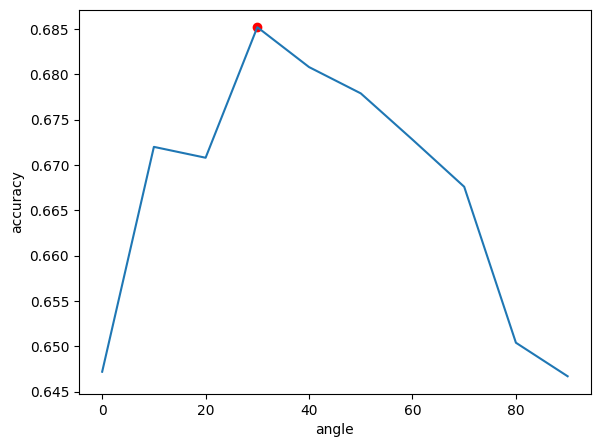

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

Let us do a grid search to find the best shear constraint.

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-33-8a89fef4983d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6198
Accuracy after shear augmentation constrained by  0.4  is  0.6289
Accuracy after shear augmentation constrained by  0.6  is  0.6444
Accuracy after shear augmentation constrained by  0.8  is  0.6556
Accuracy after shear augmentation constrained by  1.0  is  0.6561
Accuracy after shear augmentation constrained by  1.2  is  0.6275
Accuracy after shear augmentation constrained by  1.4  is  0.6244
Accuracy after shear augmentation constrained by  1.6  is  0.596
Accuracy after shear augmentation constrained by  1.8  is  0.6067
Accuracy after shear augmentation constrained by  2.0  is  0.6345


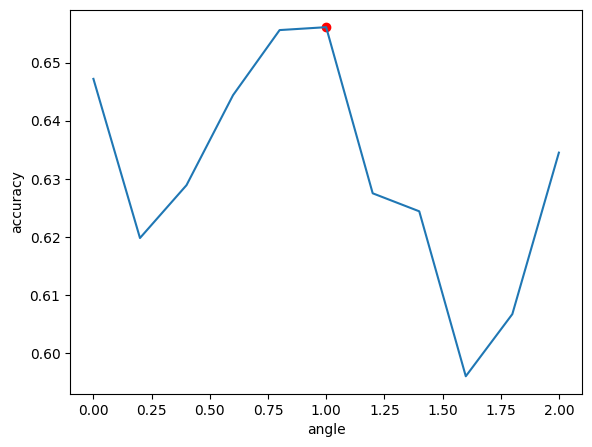

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters.

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

<ipython-input-36-09de780976d0>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6057
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.596
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.6142
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.6015
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.6103
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.5736
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6334
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.6096
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5994
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.5942
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.5971
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.6032
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.6162
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6335
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.5

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

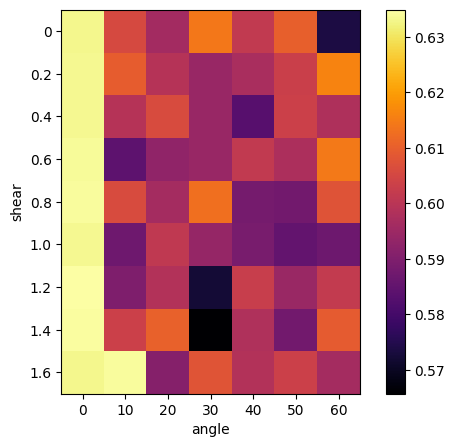

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them.
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
2. Can you increase the accuracy by increasing the number of augmentations from each sample?
3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>
4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch.

**solutions**

1.Baseline accuracy without augmentation we got is 0.6472
Accuracy using augmentations are:

Rotation Augmentation:

Highest accuracy after rotation augmentation constrained by 30 degrees is 0.6798. The effectiveness of rotation augmentation depends on factors like the nature of the data and the task.

Shear Augmentation:

Highest accuracy after shear augmentation constrained by 1.0 is 0.6561.
Like rotation, shear augmentation might improve or decrease accuracy based on the characteristics of the dataset and the problem.

The best accuracy after applying both shear and rotation augmentation is when rotation angle zero which is something aroud 0.63.



2. Increasing the number of augmentations from each sample can potentially improve the accuracy of your model. Augmenting data by applying various transformations to each image can lead to a more diverse and representative training dataset, which in turn can help the model generalize better to unseen data.

When you apply multiple augmentations to each, you introduce more variability and diversity into the training data.

3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])

11490434/11490434 [==============================] - 0s 0us/step
(28, 28) 5


In [2]:
train_X = train_X/255
test_X = test_X/255

#train_X[0].shape, train_X[0]

In [3]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy()

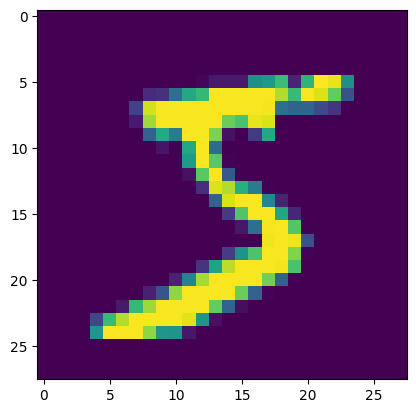

In [4]:
plt.imshow(train_X[0])

In [5]:

# Add some random noise to image.

from skimage.util import random_noise
from skimage.filters import gaussian
import random

In [6]:
## Augmentations 1 (Adding blurr to Images)


def aug_Blurr(sample):

  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional


  blur = rng.random(len(sample)) # generate random numbers for blur

  nsample = sample.copy()

  for ii in range(len(sample)):
    nsample[ii] = gaussian(sample[ii], blur[ii])

  return np.squeeze(nsample)


## Augmentations 2 (Adding noise to Images)



def aug_Noise(sample, sd_noise):

  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional


  noise = (sd_noise)**2

  nsample = sample.copy()

  for ii in range(len(sample)):
    nsample[ii] = random_noise(sample[ii], var = noise)

  return np.squeeze(nsample)

## Augmentation 3 (Random cropping of image)

def aug_Crop(sample, crop_size):

    width = random.randint(0, sample.shape[1] - crop_size[1])
    height = random.randint(0, sample.shape[0] - crop_size[0])

    cropped_image = sample[height:height+crop_size[0], width:width+crop_size[1]]

    return np.squeeze(cropped_image)



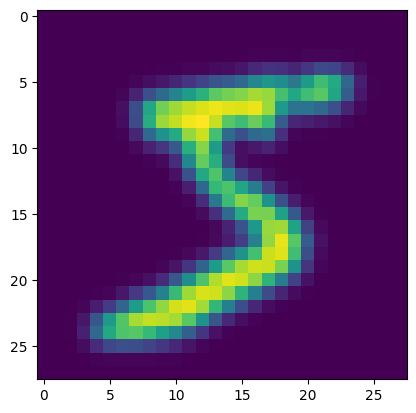

In [7]:
# blurred image sample

plt.imshow(aug_Blurr(train_X[0]))

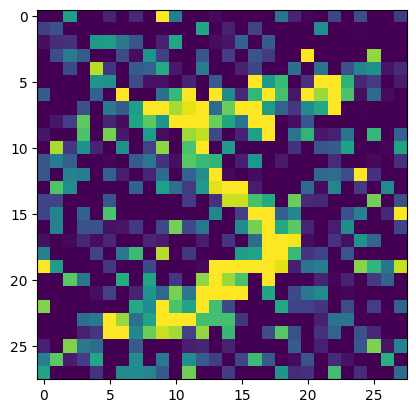

In [9]:
# noise applied image sample

noise = 0.4
plt.imshow(aug_Noise(train_X[0], noise))


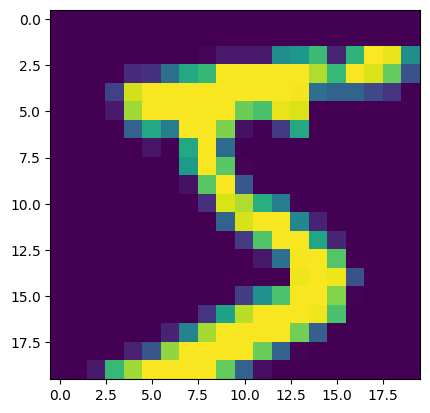

In [11]:
# crop augmentation

input_image = train_X[0] # 28x28 image input
output_size = (20, 20)

plt.imshow(aug_Crop(input_image, output_size))


In [14]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

In [16]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [18]:
# blur augmentation

naugmentations = 6

# data
aug_data = train_X
aug_label = train_y

for ii in range(naugmentations):
  aug_data = np.concatenate((aug_data, aug_Blurr(train_X)))
  aug_label = np.concatenate((aug_label, train_y))

# check the test accuracy
testpred = NN(aug_data, aug_label, test_X)
print('Accuracy applying blur augmentation is ', Accuracy(test_y, testpred))

Accuracy applying blur augmentation is  0.6852


In [19]:
# noise augmentation

sd_noise = 0.155
naugmentations = 5

# data!
aug_data = train_X
aug_label = train_y

for ii in range(naugmentations):
  aug_data = np.concatenate((aug_data, aug_Noise(train_X, sd_noise)))
  aug_label = np.concatenate((aug_label, train_y))

# check the test accuracy
testpred = NN(aug_data, aug_label, test_X)
print('Accuracy applying noise augmentation is ', Accuracy(test_y, testpred))

Accuracy applying noise augmentation is  0.6453


Accuracy by applying blur augmentation=0.6852
Accuracy by applying noise augmentation=0.6453

4.


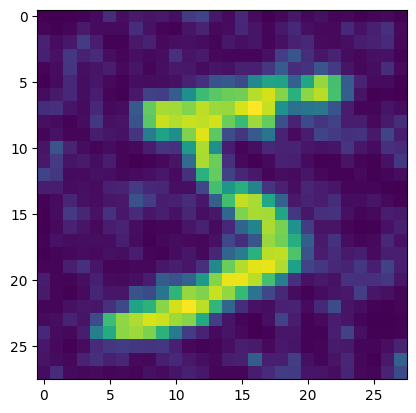

In [20]:
# both noise and blur augmentation

plt.imshow(aug_Blurr(aug_Noise(train_X[0], sd_noise)))



In [21]:
## Applying blur and noise augmentation

sd_noise = 0.155
naugmentations = 5

# data!
aug_data = train_X
aug_label = train_y

for ii in range(naugmentations):
  aug_data = np.concatenate((aug_data, aug_Blurr(aug_Noise(train_X, sd_noise))))
  aug_label = np.concatenate((aug_label, train_y))

# check the test accuracy
testpred = NN(aug_data, aug_label, test_X)
print('Accuracy applying noise augmentation is ', Accuracy(test_y, testpred))

Accuracy applying noise augmentation is  0.6769


After applying both blur and noise augmentation got an accuracy of 67.26, it also keep changing after running each time

In [29]:
# Using a subset of the training dataset

sample_aug_data = train_X[:12]
sample_aug_label = train_y[:12]


In [30]:

len(sample_aug_data)

12

In [31]:
import numpy as np

# Define your augmentation functions (aug_Blurr and aug_Noise) and your NN function here

# Assuming aug_Blurr and aug_Noise are defined properly

# Parameters
naugmentations = 11
sd_noise = 0.1  # Standard deviation for noise augmentation

# Lists to store augmented data and labels
augmented_data = []
augmented_labels = []

# Data augmentation loop
for ii in range(naugmentations):
    # Apply noise augmentation to the data
    aug_data = aug_Noise(train_X[ii % len(train_X)], sd_noise)

    # Apply blurring augmentation to the data
    aug_data = aug_Blurr(aug_data)

    # Store augmented data and corresponding label
    augmented_data.append(aug_data)
    augmented_labels.append(train_y[ii % len(train_y)])  # Assuming train_y is the corresponding labels

# Convert lists to numpy arrays
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

# Evaluate on test data
test_accuracy = Accuracy(test_y[:naugmentations], NN(augmented_data, augmented_labels, test_X[:naugmentations]))

print("Accuracy applying noise and blurring augmentation is:", test_accuracy)


Accuracy applying noise and blurring augmentation is: 0.45454545454545453
